# Text Analysis

# Web Scraping
- Let us go to Yahoo Finance 
- And try to get some data for AAPL

- the landing page URL is 
https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch
- The base url here is 
    https://finance.yahoo.com/quote/AAPL
- The query is 
      - ?p=AAPL&.tsrc=fin-srch
      - p and .tsrc are query keys
      - AAPL and fin-srch are corresponding values
      - & is the query separator
    
- try look at statistics. The statistics URL is 
https://finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL

- We will use 
    - Requests to fetch the html page
    - Beautiful Soup to parse the html
    - pandas read_html to get the tables


In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import lxml
from lxml import html

In [2]:
# Extract Data of AAPL from Yahoo
# Use requests to get the page
page=requests.get("https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch")
page

<Response [200]>

- 200 is the status code and it means the page was successfuly obtained
- Let us use BeautifulSoup to parse the data

In [3]:
soup=BeautifulSoup(page.content,'lxml')

In [4]:
# You can search by tags by using find_all function in Beautiful Soup
title=soup.find_all('title')
title

[<title>Apple Inc. (AAPL) Stock Price, News, Quote &amp; History - Yahoo Finance</title>]

In [5]:
type(title)

bs4.element.ResultSet

In [6]:
len(title)

1

In [7]:
title[0].text

'Apple Inc. (AAPL) Stock Price, News, Quote & History - Yahoo Finance'

In [8]:
# We need tables from the soup.
# Use find_all function that looks at table tags
tables=soup.find_all('table')
tables

[<table class="W(100%)" data-reactid="92"><tbody data-reactid="93"><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="94"><td class="C($primaryColor) W(51%)" data-reactid="95"><span data-reactid="96">Previous Close</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="97" data-test="PREV_CLOSE-value"><span class="Trsdu(0.3s)" data-reactid="98">118.03</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="99"><td class="C($primaryColor) W(51%)" data-reactid="100"><span data-reactid="101">Open</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="102" data-test="OPEN-value"><span class="Trsdu(0.3s)" data-reactid="103">117.59</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="104"><td class="C($primaryColor) W(51%)" data-reactid="105"><span data-reactid="106">Bid</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="107" data-test="BID-value"><span 

In [9]:
# There are two tables
len(tables)

2

In [10]:
# First table
tables[0]

<table class="W(100%)" data-reactid="92"><tbody data-reactid="93"><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="94"><td class="C($primaryColor) W(51%)" data-reactid="95"><span data-reactid="96">Previous Close</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="97" data-test="PREV_CLOSE-value"><span class="Trsdu(0.3s)" data-reactid="98">118.03</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="99"><td class="C($primaryColor) W(51%)" data-reactid="100"><span data-reactid="101">Open</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="102" data-test="OPEN-value"><span class="Trsdu(0.3s)" data-reactid="103">117.59</span></td></tr><tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="104"><td class="C($primaryColor) W(51%)" data-reactid="105"><span data-reactid="106">Bid</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="107" data-test="BID-value"><span c

In [11]:
table1=soup.find('table',{"data-reactid":"92"})
trows=table1.find_all('tr')
for row in trows:
    print(row.get_text())

Previous Close118.03
Open117.59
Bid117.87 x 800
Ask117.88 x 1100
Day's Range116.81 - 118.38
52 Week Range53.15 - 137.98
Volume48,324,182
Avg. Volume155,713,818


In [12]:
td=table1.find_all('td')
for d in td:
    print(d.get_text())

Previous Close
118.03
Open
117.59
Bid
117.87 x 800
Ask
117.88 x 1100
Day's Range
116.81 - 118.38
52 Week Range
53.15 - 137.98
Volume
48,324,182
Avg. Volume
155,713,818


In [13]:
# How to read the data
# Use read_html function in pandas
# read_html accepts string 
# So convert the tables to string and use it
t=pd.read_html(str(tables[0]))
t

[                0                1
 0  Previous Close           118.03
 1            Open           117.59
 2             Bid     117.87 x 800
 3             Ask    117.88 x 1100
 4     Day's Range  116.81 - 118.38
 5   52 Week Range   53.15 - 137.98
 6          Volume         48324182
 7     Avg. Volume        155713818]

In [14]:
# The ouput is a list
type(t)

list

In [15]:
# The first element is a dataframe
type(t[0])

pandas.core.frame.DataFrame

In [16]:
# Copy into a dataframe
t1=t[0].copy()

In [17]:
# First row
t1.loc[0]

0    Previous Close
1            118.03
Name: 0, dtype: object

In [18]:
# First column
t1[0]

0    Previous Close
1              Open
2               Bid
3               Ask
4       Day's Range
5     52 Week Range
6            Volume
7       Avg. Volume
Name: 0, dtype: object

In [19]:
# Change the index to first columns
t1.index=t1[0]
t2=t1[1]
t2

0
Previous Close             118.03
Open                       117.59
Bid                  117.87 x 800
Ask                 117.88 x 1100
Day's Range       116.81 - 118.38
52 Week Range      53.15 - 137.98
Volume                   48324182
Avg. Volume             155713818
Name: 1, dtype: object

In [20]:
# I want Apple's previous close 
float(t2.loc["Previous Close"])

118.03

- Now there were two tables in the html
- Let us extract both


In [21]:
# write a for loop
df_tables=pd.DataFrame()
for table in tables:
# The first element of of each table object is a dataframe
    df_tables=df_tables.append(pd.read_html(str(table))[0])
df_tables_1=df_tables.copy()
# Use the first column as index
df_tables_1.index=df_tables_1[0]
# Extract the second column as it containst the values
df_tables_1[1]

0
Previous Close                                   118.03
Open                                             117.59
Bid                                        117.87 x 800
Ask                                       117.88 x 1100
Day's Range                             116.81 - 118.38
52 Week Range                            53.15 - 137.98
Volume                                         48324182
Avg. Volume                                   155713818
Market Cap                                       2.008T
Beta (5Y Monthly)                                  1.35
PE Ratio (TTM)                                    36.00
EPS (TTM)                                          3.28
Earnings Date               Jan 26, 2021 - Feb 01, 2021
Forward Dividend & Yield                   0.82 (0.69%)
Ex-Dividend Date                           Nov 06, 2020
1y Target Est                                    124.81
Name: 1, dtype: object

# Task
- Extract all the tables and values from statistics page for AAPL
- The output must be a dataframe 
    - The index of the dataframe must be the variable name
    - The only column must contain the latest values 

In [22]:
# Extract Data of AAPL from Yahoo
# Use requests to get the page
page=requests.get("https://finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL")
soup=BeautifulSoup(page.content,'lxml')
tables=soup.find_all('table')
tables

[<table class="W(100%) Bdcl(c) M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)" data-reactid="52"><thead data-reactid="53"><tr class="Bdtw(0px) C($primaryColor)" data-reactid="54"><th class="Fw(400) Pend(10px) Pos(st) Start(0) Pend(10px) Bgc($lv2BgColor) Z(1)" data-reactid="55"><!-- react-text: 56 --> <!-- /react-text --><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)" data-reactid="57"></div></th><th class="Fw(b) Ta(c) Pstart(6px) Pend(4px) Py(6px) Miw(fc) Miw(fc)--pnclg Bgc($lv1BgColor) Pend(0)" data-reactid="58"><span class="Pos(r) smplTblTooltip" data-reactid="59"><span class="Pos(a) Z(3) Bgc($lv3BgColor) Bd($featurePromoBorder) Bxsh($boxAreaShadow) smplTblTooltip:h_V(v) V(h) W(150px) P(10px) D(ib) Fz(12px) C($tertiaryColor) Fw(500) Mt(25px)" data-reactid="60"><!-- react-text: 61 -->As of Date: 11/15/2020<!-- /react-text --><div class="Pos(a) H(0) W(0) Bdbc($seperatorColor) End(100%) Bds(s) Bdw(10px) Bdstartc(t) Bdendc(t) Bdtc(t)" da

In [23]:
len(tables)

10

In [24]:
# Each table though has different number of columns
pd.read_html(str(tables[0]))

[                    Unnamed: 0 As of Date: 11/15/2020Current 9/30/2020  \
 0      Market Cap (intraday) 5                         2.03T     1.97T   
 1           Enterprise Value 3                         2.05T     1.99T   
 2                 Trailing P/E                         36.36     35.12   
 3                Forward P/E 1                         30.03     30.12   
 4  PEG Ratio (5 yr expected) 1                          2.99      2.86   
 5            Price/Sales (ttm)                          7.61      7.50   
 6             Price/Book (mrq)                         31.03     27.20   
 7   Enterprise Value/Revenue 3                          7.46     30.69   
 8    Enterprise Value/EBITDA 6                         25.29    108.89   
 
   6/30/2020 3/31/2020 12/31/2019 9/30/2019  
 0     1.56T     1.10T      1.29T   995.15B  
 1     1.58T     1.10T      1.30T     1.01T  
 2     28.52     20.02      24.70     19.01  
 3     24.33     19.65      22.17     17.27  
 4      2.02      

In [25]:
# write a for loop from tables 2 to 10
# they only have two columns with no given column names 
df_tables=pd.DataFrame()
tables1 = tables[1:]
for table in tables1:
    df_tables=df_tables.append(pd.read_html(str(table))[0])
df_tables_1=df_tables.copy()
df_tables_1.index=df_tables_1[0]
df_tables_1[1]

0
Beta (5Y Monthly)                                         1.35
52-Week Change 3                                        80.19%
S&P500 52-Week Change 3                                 14.96%
52 Week High 3                                          137.98
52 Week Low 3                                            53.15
50-Day Moving Average 3                                 116.58
200-Day Moving Average 3                                103.17
Avg Vol (3 month) 3                                    155.71M
Avg Vol (10 day) 3                                      103.9M
Shares Outstanding 5                                     17.1B
Float                                                   16.98B
% Held by Insiders 1                                     0.07%
% Held by Institutions 1                                59.73%
Shares Short (Oct 29, 2020) 4                           80.53M
Short Ratio (Oct 29, 2020) 4                              0.61
Short % of Float (Oct 29, 2020) 4                    

In [26]:
# Now work with first table
pd.read_html(str(tables[0]))[0]

,Unnamed: 0,As of Date: 11/15/2020Current,9/30/2020,6/30/2020,3/31/2020,12/31/2019,9/30/2019
0,Market Cap (intraday) 5,2.03T,1.97T,1.56T,1.10T,1.29T,995.15B
1,Enterprise Value 3,2.05T,1.99T,1.58T,1.10T,1.30T,1.01T
2,Trailing P/E,36.36,35.12,28.52,20.02,24.70,19.01
3,Forward P/E 1,30.03,30.12,24.33,19.65,22.17,17.27
4,PEG Ratio (5 yr expected) 1,2.99,2.86,2.02,1.58,2.03,2.04
5,Price/Sales (ttm),7.61,7.50,6.12,4.34,5.25,4.09
6,Price/Book (mrq),31.03,27.20,19.93,12.28,14.23,10.32
7,Enterprise Value/Revenue 3,7.46,30.69,26.44,18.88,14.11,15.76
8,Enterprise Value/EBITDA 6,25.29,108.89,95.15,66.00,43.87,50.16


In [28]:
# This table has column names so we have to use that
t1=pd.read_html(str(tables[0]))[0].copy()
t1.index=t1["Unnamed: 0"]
t1["As of Date: 11/15/2020Current"]

Unnamed: 0
Market Cap (intraday) 5        2.03T
Enterprise Value 3             2.05T
Trailing P/E                   36.36
Forward P/E 1                  30.03
PEG Ratio (5 yr expected) 1     2.99
Price/Sales (ttm)               7.61
Price/Book (mrq)               31.03
Enterprise Value/Revenue 3      7.46
Enterprise Value/EBITDA 6      25.29
Name: As of Date: 11/15/2020Current, dtype: object

In [29]:
# Another way of doing it
df_tables=pd.DataFrame()
for table in tables:
    df1=pd.read_html(str(table))[0]
# change the column names
    df1.columns=range(0,len(df1.columns))
    df_tables=df_tables.append(df1)
df_tables_1=df_tables.copy()
df_tables_1.index=df_tables_1[0]
df_tables_1[1]

0
Market Cap (intraday) 5                                  2.03T
Enterprise Value 3                                       2.05T
Trailing P/E                                             36.36
Forward P/E 1                                            30.03
PEG Ratio (5 yr expected) 1                               2.99
Price/Sales (ttm)                                         7.61
Price/Book (mrq)                                         31.03
Enterprise Value/Revenue 3                                7.46
Enterprise Value/EBITDA 6                                25.29
Beta (5Y Monthly)                                         1.35
52-Week Change 3                                        80.19%
S&P500 52-Week Change 3                                 14.96%
52 Week High 3                                          137.98
52 Week Low 3                                            53.15
50-Day Moving Average 3                                 116.58
200-Day Moving Average 3                             

In [30]:
# Use format function
# We can send a string 
# The string will be placed in the place of {}
"https://finance.yahoo.com/quote/{0}?p={0}&.tsrc=fin-srch".format("TSLA")

'https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch'

In [31]:
def get_data_from_yahoo(ticker):
    page=requests.get("https://finance.yahoo.com/quote/{0}?p={0}&.tsrc=fin-srch".format(ticker))
    soup=BeautifulSoup(page.content,'lxml')
    tables=soup.find_all('table')
    df_tables=pd.DataFrame()
    for table in tables:
        df1=pd.read_html(str(table))[0]
        df1.columns=range(0,len(df1.columns))
        df_tables=df_tables.append(df1)
    df_tables_1=df_tables.copy()
    df_tables_1.index=df_tables_1[0]
    return df_tables_1[1]    

In [32]:
get_data_from_yahoo('TSLA')

0
Previous Close                                   486.64
Open                                             492.00
Bid                                        498.00 x 900
Ask                                        498.08 x 900
Day's Range                             487.60 - 508.61
52 Week Range                            65.42 - 508.61
Volume                                         48272311
Avg. Volume                                    59037643
Market Cap                                     477.624B
Beta (5Y Monthly)                                  1.97
PE Ratio (TTM)                                   963.43
EPS (TTM)                                          0.52
Earnings Date               Jan 27, 2021 - Feb 01, 2021
Forward Dividend & Yield                      N/A (N/A)
Ex-Dividend Date                                    NaN
1y Target Est                                    354.28
Name: 1, dtype: object

In [33]:
# Get news report
page=requests.get("https://finance.yahoo.com/news/nikola-beats-third-quarter-forecast-212439967.html")
soup=BeautifulSoup(page.content,'lxml')
title=soup.find_all('title')

# Task 2
- Extract the text of news report alone from the page 

In [34]:
text=soup.get_text()
text

'\n        window.performance.mark(\'PageStart\');\n        document.documentElement.className += \' JsEnabled jsenabled\';\n        /**\n        * Empty darlaOnready method, to avoid JS error.\n        * This can happen when Async Darla JS file is loaded earlier than Darla Proxy JS.\n        * This method will be overridden by Darla Proxy\n        */\n        window.darlaOnready = function() {};\n        Electric-Truck Startup Nikola Says Talks With GM Ongoing!function(n,e){var t,o,i,c=[],f={passive:!0,capture:!0},r=new Date,a="pointerup",u="pointercancel";function p(n,c){t||(t=c,o=n,i=new Date,w(e),s())}function s(){o>=0&&o<i-r&&(c.forEach(function(n){n(o,t)}),c=[])}function l(t){if(t.cancelable){var o=(t.timeStamp>1e12?new Date:performance.now())-t.timeStamp;"pointerdown"==t.type?function(t,o){function i(){p(t,o),r()}function c(){r()}function r(){e(a,i,f),e(u,c,f)}n(a,i,f),n(u,c,f)}(o,t):p(o,t)}}function w(n){["click","mousedown","keydown","touchstart","pointerdown"].forEach(functio

In [35]:
text=soup.find_all('meta')
len(text)

24

In [36]:
# Extract from tag itself
text=soup.find_all('meta',{"name":"description"})
text[0]["content"]

'(Bloomberg) -- Nikola Corp. said talks with prospective partner General Motors Co. are ongoing as the electric-truck startup struggles to assure investors that its business model remains viable amid federal regulatory probes.The two companies are discussing a strategic partnership announced in September, which would give GM an 11% stake in Nikola in exchange for providing its battery and hydrogen-fuel cell technology and manufacturing Nikola’s debut pickup truck.Nikola executives reiterated Monday that they have a “base plan” to proceed with battery-electric and fuel-cell trucks even if the GM deal is not closed, noting existing technology-sharing deals with other partners such as Robert Bosch GmbH. The company also will move ahead on hydrogen-fueling stations even without a partner for that project, they said.A short seller’s allegations of deception against Nikola -- which the company has denied -- have clouded the outlook for a deal with GM, but they remain in negotiations ahead of

In [37]:
# Using paragraphs not helpful
text=soup.find_all('p')
for p in text:
    print(p.get_text())

(Bloomberg) -- Nikola Corp. said talks with prospective partner General Motors Co. are ongoing as the electric-truck startup struggles to assure investors that its business model remains viable amid federal regulatory probes.
The two companies are discussing a strategic partnership announced in September, which would give GM an 11% stake in Nikola in exchange for providing its battery and hydrogen-fuel cell technology and manufacturing Nikola’s debut pickup truck.
Nikola executives reiterated Monday that they have a “base plan” to proceed with battery-electric and fuel-cell trucks even if the GM deal is not closed, noting existing technology-sharing deals with other partners such as Robert Bosch GmbH. The company also will move ahead on hydrogen-fueling stations even without a partner for that project, they said.
A short seller’s allegations of deception against Nikola -- which the company has denied -- have clouded the outlook for a deal with GM, but they remain in negotiations ahead 

In [40]:
text=soup.find_all('meta',{"name":"description"})
t_content=text[0]["content"]
t_content

'(Bloomberg) -- Nikola Corp. said talks with prospective partner General Motors Co. are ongoing as the electric-truck startup struggles to assure investors that its business model remains viable amid federal regulatory probes.The two companies are discussing a strategic partnership announced in September, which would give GM an 11% stake in Nikola in exchange for providing its battery and hydrogen-fuel cell technology and manufacturing Nikola’s debut pickup truck.Nikola executives reiterated Monday that they have a “base plan” to proceed with battery-electric and fuel-cell trucks even if the GM deal is not closed, noting existing technology-sharing deals with other partners such as Robert Bosch GmbH. The company also will move ahead on hydrogen-fueling stations even without a partner for that project, they said.A short seller’s allegations of deception against Nikola -- which the company has denied -- have clouded the outlook for a deal with GM, but they remain in negotiations ahead of

In [41]:
# Regular Expressions

In [42]:
import re

- For details go to 
https://docs.python.org/3/library/re.html

In [43]:
y=re.findall("\w+",t_content)
y

['Bloomberg',
 'Nikola',
 'Corp',
 'said',
 'talks',
 'with',
 'prospective',
 'partner',
 'General',
 'Motors',
 'Co',
 'are',
 'ongoing',
 'as',
 'the',
 'electric',
 'truck',
 'startup',
 'struggles',
 'to',
 'assure',
 'investors',
 'that',
 'its',
 'business',
 'model',
 'remains',
 'viable',
 'amid',
 'federal',
 'regulatory',
 'probes',
 'The',
 'two',
 'companies',
 'are',
 'discussing',
 'a',
 'strategic',
 'partnership',
 'announced',
 'in',
 'September',
 'which',
 'would',
 'give',
 'GM',
 'an',
 '11',
 'stake',
 'in',
 'Nikola',
 'in',
 'exchange',
 'for',
 'providing',
 'its',
 'battery',
 'and',
 'hydrogen',
 'fuel',
 'cell',
 'technology',
 'and',
 'manufacturing',
 'Nikola',
 's',
 'debut',
 'pickup',
 'truck',
 'Nikola',
 'executives',
 'reiterated',
 'Monday',
 'that',
 'they',
 'have',
 'a',
 'base',
 'plan',
 'to',
 'proceed',
 'with',
 'battery',
 'electric',
 'and',
 'fuel',
 'cell',
 'trucks',
 'even',
 'if',
 'the',
 'GM',
 'deal',
 'is',
 'not',
 'closed',
 'n

In [44]:
y

['Bloomberg',
 'Nikola',
 'Corp',
 'said',
 'talks',
 'with',
 'prospective',
 'partner',
 'General',
 'Motors',
 'Co',
 'are',
 'ongoing',
 'as',
 'the',
 'electric',
 'truck',
 'startup',
 'struggles',
 'to',
 'assure',
 'investors',
 'that',
 'its',
 'business',
 'model',
 'remains',
 'viable',
 'amid',
 'federal',
 'regulatory',
 'probes',
 'The',
 'two',
 'companies',
 'are',
 'discussing',
 'a',
 'strategic',
 'partnership',
 'announced',
 'in',
 'September',
 'which',
 'would',
 'give',
 'GM',
 'an',
 '11',
 'stake',
 'in',
 'Nikola',
 'in',
 'exchange',
 'for',
 'providing',
 'its',
 'battery',
 'and',
 'hydrogen',
 'fuel',
 'cell',
 'technology',
 'and',
 'manufacturing',
 'Nikola',
 's',
 'debut',
 'pickup',
 'truck',
 'Nikola',
 'executives',
 'reiterated',
 'Monday',
 'that',
 'they',
 'have',
 'a',
 'base',
 'plan',
 'to',
 'proceed',
 'with',
 'battery',
 'electric',
 'and',
 'fuel',
 'cell',
 'trucks',
 'even',
 'if',
 'the',
 'GM',
 'deal',
 'is',
 'not',
 'closed',
 'n

In [45]:
y=re.findall("GMBH",t_content)

In [46]:
y

[]

In [47]:
y=re.findall("gmbh",t_content.lower())
y

['gmbh']

In [48]:
y=t_content.lower().split()
[int(s) for s in y if s.isdigit()]

[3, 10, 700, 2021, 2023]

In [49]:
y=re.findall("\d+",t_content.lower())
y

['11',
 '3',
 '19',
 '10',
 '56',
 '2',
 '2',
 '4',
 '9',
 '18',
 '63',
 '2020',
 '2021',
 '700',
 '2021',
 '2023',
 '80',
 '16',
 '20',
 '16',
 '5',
 '58',
 '8',
 '70',
 '8',
 '47',
 '11',
 '1',
 '2019',
 '2020']

In [50]:
y=re.findall("\w\w\w+",t_content.lower())
y

['bloomberg',
 'nikola',
 'corp',
 'said',
 'talks',
 'with',
 'prospective',
 'partner',
 'general',
 'motors',
 'are',
 'ongoing',
 'the',
 'electric',
 'truck',
 'startup',
 'struggles',
 'assure',
 'investors',
 'that',
 'its',
 'business',
 'model',
 'remains',
 'viable',
 'amid',
 'federal',
 'regulatory',
 'probes',
 'the',
 'two',
 'companies',
 'are',
 'discussing',
 'strategic',
 'partnership',
 'announced',
 'september',
 'which',
 'would',
 'give',
 'stake',
 'nikola',
 'exchange',
 'for',
 'providing',
 'its',
 'battery',
 'and',
 'hydrogen',
 'fuel',
 'cell',
 'technology',
 'and',
 'manufacturing',
 'nikola',
 'debut',
 'pickup',
 'truck',
 'nikola',
 'executives',
 'reiterated',
 'monday',
 'that',
 'they',
 'have',
 'base',
 'plan',
 'proceed',
 'with',
 'battery',
 'electric',
 'and',
 'fuel',
 'cell',
 'trucks',
 'even',
 'the',
 'deal',
 'not',
 'closed',
 'noting',
 'existing',
 'technology',
 'sharing',
 'deals',
 'with',
 'other',
 'partners',
 'such',
 'robert',

In [51]:
y=re.findall("\d.*",t_content.lower())
y

['11% stake in nikola in exchange for providing its battery and hydrogen-fuel cell technology and manufacturing nikola’s debut pickup truck.nikola executives reiterated monday that they have a “base plan” to proceed with battery-electric and fuel-cell trucks even if the gm deal is not closed, noting existing technology-sharing deals with other partners such as robert bosch gmbh. the company also will move ahead on hydrogen-fueling stations even without a partner for that project, they said.a short seller’s allegations of deception against nikola -- which the company has denied -- have clouded the outlook for a deal with gm, but they remain in negotiations ahead of a dec. 3 deadline.“there has been a lot of speculation about our ongoing discussions with gm. discussions do continue,” mark russell, the company’s chief executive officer, told analysts monday on a conference call. “we’re interested in doing the deal with gm, if we can get it done.”gm ceo mary barra said last week the propos

In [52]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Stopwords are words like a, an, the
stopwords= set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\badrinath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\badrinath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\badrinath\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [53]:
stopwords=stopwords.union(set(string.punctuation))
stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [54]:
tokens=[token for token in nltk.tokenize.word_tokenize(t_content)]
tokens

['(',
 'Bloomberg',
 ')',
 '--',
 'Nikola',
 'Corp.',
 'said',
 'talks',
 'with',
 'prospective',
 'partner',
 'General',
 'Motors',
 'Co.',
 'are',
 'ongoing',
 'as',
 'the',
 'electric-truck',
 'startup',
 'struggles',
 'to',
 'assure',
 'investors',
 'that',
 'its',
 'business',
 'model',
 'remains',
 'viable',
 'amid',
 'federal',
 'regulatory',
 'probes.The',
 'two',
 'companies',
 'are',
 'discussing',
 'a',
 'strategic',
 'partnership',
 'announced',
 'in',
 'September',
 ',',
 'which',
 'would',
 'give',
 'GM',
 'an',
 '11',
 '%',
 'stake',
 'in',
 'Nikola',
 'in',
 'exchange',
 'for',
 'providing',
 'its',
 'battery',
 'and',
 'hydrogen-fuel',
 'cell',
 'technology',
 'and',
 'manufacturing',
 'Nikola',
 '’',
 's',
 'debut',
 'pickup',
 'truck.Nikola',
 'executives',
 'reiterated',
 'Monday',
 'that',
 'they',
 'have',
 'a',
 '“',
 'base',
 'plan',
 '”',
 'to',
 'proceed',
 'with',
 'battery-electric',
 'and',
 'fuel-cell',
 'trucks',
 'even',
 'if',
 'the',
 'GM',
 'deal',
 '

In [55]:
tokens1 = [token for token in tokens if not token in stopwords]
tokens1

['Bloomberg',
 '--',
 'Nikola',
 'Corp.',
 'said',
 'talks',
 'prospective',
 'partner',
 'General',
 'Motors',
 'Co.',
 'ongoing',
 'electric-truck',
 'startup',
 'struggles',
 'assure',
 'investors',
 'business',
 'model',
 'remains',
 'viable',
 'amid',
 'federal',
 'regulatory',
 'probes.The',
 'two',
 'companies',
 'discussing',
 'strategic',
 'partnership',
 'announced',
 'September',
 'would',
 'give',
 'GM',
 '11',
 'stake',
 'Nikola',
 'exchange',
 'providing',
 'battery',
 'hydrogen-fuel',
 'cell',
 'technology',
 'manufacturing',
 'Nikola',
 '’',
 'debut',
 'pickup',
 'truck.Nikola',
 'executives',
 'reiterated',
 'Monday',
 '“',
 'base',
 'plan',
 '”',
 'proceed',
 'battery-electric',
 'fuel-cell',
 'trucks',
 'even',
 'GM',
 'deal',
 'closed',
 'noting',
 'existing',
 'technology-sharing',
 'deals',
 'partners',
 'Robert',
 'Bosch',
 'GmbH',
 'The',
 'company',
 'also',
 'move',
 'ahead',
 'hydrogen-fueling',
 'stations',
 'even',
 'without',
 'partner',
 'project',
 'said

In [56]:
# Lemmatize words
lemma = nltk.WordNetLemmatizer()

In [57]:
tokens2 = [lemma.lemmatize(token) for token in tokens1]
tokens2

['Bloomberg',
 '--',
 'Nikola',
 'Corp.',
 'said',
 'talk',
 'prospective',
 'partner',
 'General',
 'Motors',
 'Co.',
 'ongoing',
 'electric-truck',
 'startup',
 'struggle',
 'assure',
 'investor',
 'business',
 'model',
 'remains',
 'viable',
 'amid',
 'federal',
 'regulatory',
 'probes.The',
 'two',
 'company',
 'discussing',
 'strategic',
 'partnership',
 'announced',
 'September',
 'would',
 'give',
 'GM',
 '11',
 'stake',
 'Nikola',
 'exchange',
 'providing',
 'battery',
 'hydrogen-fuel',
 'cell',
 'technology',
 'manufacturing',
 'Nikola',
 '’',
 'debut',
 'pickup',
 'truck.Nikola',
 'executive',
 'reiterated',
 'Monday',
 '“',
 'base',
 'plan',
 '”',
 'proceed',
 'battery-electric',
 'fuel-cell',
 'truck',
 'even',
 'GM',
 'deal',
 'closed',
 'noting',
 'existing',
 'technology-sharing',
 'deal',
 'partner',
 'Robert',
 'Bosch',
 'GmbH',
 'The',
 'company',
 'also',
 'move',
 'ahead',
 'hydrogen-fueling',
 'station',
 'even',
 'without',
 'partner',
 'project',
 'said.A',
 'sho

In [58]:
[token for token in tokens2 if not token in tokens1]

['talk',
 'struggle',
 'investor',
 'allegation',
 'negotiation',
 'discussion',
 'analyst',
 'investigation',
 'subpoena',
 'subpoena',
 'director',
 'employee',
 'investor',
 'allegation',
 'analyst',
 'talk',
 'contract',
 'order',
 'analyst',
 'compare',
 'tax',
 'maker',
 'measure',
 'analyst',
 'win',
 'proposal',
 'make',
 'detail',
 'probe',
 'article',
 'u']

In [59]:
word_frequency = nltk.FreqDist([token for token in tokens2 if token not in stopwords])

In [60]:
word_frequency

FreqDist({'Nikola': 11, 'company': 10, '’': 10, '“': 7, '”': 7, 'said': 6, 'GM': 6, 'loss': 6, '--': 5, 'deal': 5, ...})

In [61]:
type(word_frequency)

nltk.probability.FreqDist

In [62]:
len(word_frequency)

371

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

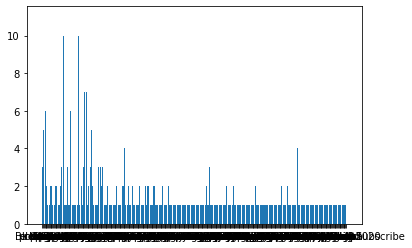

In [64]:
w=word_frequency.keys()
c=word_frequency.values()
plt.bar(w,c)
plt.show()

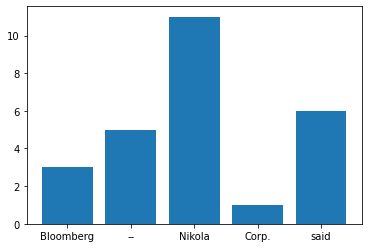

In [65]:
w1=list(w)[0:5]
c1=list(c)[0:5]
plt.bar(w1,c1)
plt.show()

# Bag of Words
- We discard the structures like paragraphs, sentences etc
- We only count how often each word appears
- Tokenization
    - Split the document into words
- Vocabulary Build
    - Build a vocabulary of words that appear in all documents
- Encoding
    - For each document count the number of times a word occurs

In [198]:
import tarfile
file=requests.get("https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz")

In [217]:
file

<Response [200]>

In [226]:
with open("C:\\Downloads\\review.tar.gz",'wb') as f:
    f.write(file.content)

In [229]:
tar=tarfile.open("C:\\Downloads\\review.tar.gz","r:gz")
tar.extractall("C:\\Downloads\\")
tar.close()

In [66]:
# Remove the folder unsup because it contains reviews not classified
from sklearn.datasets import load_files
reviews_train=load_files("C:\\Downloads\\aclImdb\\train\\")

In [67]:
X_train, y_train=reviews_train.data, reviews_train.target

In [68]:
y_train[0]

1

In [69]:
X_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [70]:
# remove the html tags
X_train=[doc.replace(b"<br />",b" ") for doc in X_train]

In [71]:
X_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vector= CountVectorizer().fit(X_train)

In [73]:
X_train_1=vector.transform(X_train)

In [74]:
X_train_1

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [75]:
feature_names=vector.get_feature_names()
len(feature_names)

74849

In [76]:
vector= CountVectorizer(min_df=100).fit(X_train)
X_train_1=vector.transform(X_train)
feature_names=vector.get_feature_names()
len(feature_names)

3832

In [77]:
feature_names[::500]

['000',
 'cameo',
 'doubt',
 'gratuitous',
 'little',
 'pitch',
 'shining',
 'trapped']

In [78]:
X_train_1.toarray()[500:510]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0]], dtype=int64)

In [79]:
feature_names[500:510]

['cameo',
 'cameos',
 'camera',
 'cameras',
 'camp',
 'campy',
 'can',
 'canada',
 'canadian',
 'candy']

In [80]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_1,y_train)

C:\Users\badrinath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
len(model.coef_[0])

3832

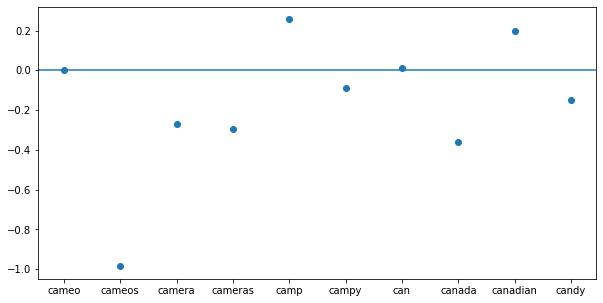

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(feature_names[500:510],model.coef_[0][500:510])
plt.axhline(y=0)

In [83]:
model.score(X_train_1,y_train)

0.94552

# TFIDF
- Instead of dropping features
- Rescale them based on their informativeness
- tf-idf (term frequency - inverse document frequency)
$$ tfidf(w,d)= tf log \frac{N+1}{N_w+1}+1$$
- w is the word
- d is the document
- N is the total number of documents
- $N_w$ is the number of documents containing w 
- tf is the number of times w occurs in document d

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector= TfidfVectorizer(min_df=5).fit(X_train)
X_train_1=vector.transform(X_train)

In [85]:
model.fit(X_train_1,y_train)
model.score(X_train_1,y_train)

C:\Users\badrinath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.93012

In [86]:
#ngrams
vector= CountVectorizer(ngram_range=(2,3)).fit(X_train)
feature_names=vector.get_feature_names()
len(feature_names)

5106275

In [87]:
feature_names[:20]

['00 01',
 '00 01 percent',
 '00 after',
 '00 after cohn',
 '00 alison',
 '00 alison agrees',
 '00 am',
 '00 am and',
 '00 am once',
 '00 am slot',
 '00 am the',
 '00 and',
 '00 and 90',
 '00 and as',
 '00 and gave',
 '00 and heard',
 '00 and painted',
 '00 and see',
 '00 and the',
 '00 and then']

In [88]:
#ngrams
vector= TfidfVectorizer(ngram_range=(2,3),min_df=100).fit(X_train)
feature_names=vector.get_feature_names()
len(feature_names)

6326

In [89]:
feature_names[:20]

['10 10',
 '10 minutes',
 '10 out',
 '10 out of',
 '10 years',
 '15 minutes',
 '20 minutes',
 '20 years',
 '20th century',
 '30 minutes',
 '90 minutes',
 'ability to',
 'able to',
 'about all',
 'about an',
 'about and',
 'about any',
 'about as',
 'about her',
 'about him']

In [90]:
X_train_1=vector.transform(X_train)
model.fit(X_train_1,y_train)
model.score(X_train_1,y_train)

C:\Users\badrinath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.898

In [91]:
# You can also use max_features, max_df
vector=CountVectorizer(max_features=10000,max_df=0.15)
X_train_1= vector.fit_transform(X_train)

# LDA - Latent Dirichlet Allocation
- Find groups that appear together


In [92]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, max_iter=5)
document_topics=lda.fit_transform(X_train_1)

In [93]:
lda.components_.shape

(5, 10000)

In [94]:
#[:,::-1] for sorting in descending order
sorting=np.argsort(lda.components_,axis=1)[:,::-1]

In [95]:
sorting

array([[ 230, 4090, 4407, ...,  648,  972, 3483],
       [8074, 7924, 9956, ..., 5638, 7713, 9992],
       [2649, 9894, 2748, ..., 9944,  344, 3801],
       [8074, 2610, 9005, ..., 9364, 3801,  304],
       [1866, 7955, 3764, ...,  344, 4837,  304]], dtype=int64)

In [96]:
sorting[:10]

array([[ 230, 4090, 4407, ...,  648,  972, 3483],
       [8074, 7924, 9956, ..., 5638, 7713, 9992],
       [2649, 9894, 2748, ..., 9944,  344, 3801],
       [8074, 2610, 9005, ..., 9364, 3801,  304],
       [1866, 7955, 3764, ...,  344, 4837,  304]], dtype=int64)

In [97]:
feature_names=np.array(vector.get_feature_names())

In [98]:
for i in range(len(sorting)):
    print("topic {}".format(i))
    print("----")
    for j in range(10):
        print(feature_names[sorting[i][j]])

topic 0
----
action
guy
horror
gets
doesn
real
find
old
down
makes
topic 1
----
show
series
years
new
role
book
between
cast
young
both
topic 2
----
director
work
doesn
us
seems
makes
world
action
every
horror
topic 3
----
show
didn
thing
re
funny
now
10
want
nothing
going
topic 4
----
comedy
sex
funny
woman
young
old
horror
seems
girl
zombie
